In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline

### 1.Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [2]:

df = pd.read_csv("../input/indian-liver-patient-records/indian_liver_patient.csv")
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### 2.Summarize important observations from the data set 

#### Some pointers which would help you, but don’t be limited by these
#### a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)


In [3]:
# dataframe dimensions
print("This dataframe has {} rows and {} columns".format(*df.shape))

This dataframe has 583 rows and 11 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
numerical_cols = df.select_dtypes(include="number").columns
print('There are',len(numerical_cols),'numeric columns')

There are 10 numeric columns


In [6]:
categorical_cols = df.select_dtypes(include="object").columns

print('There are',len(categorical_cols),'categorical columns')

There are 1 categorical columns


In [7]:
df.rename(columns={'Dataset':'target'},inplace=True)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Text(0.5, 1.0, 'Age wise liver patient')

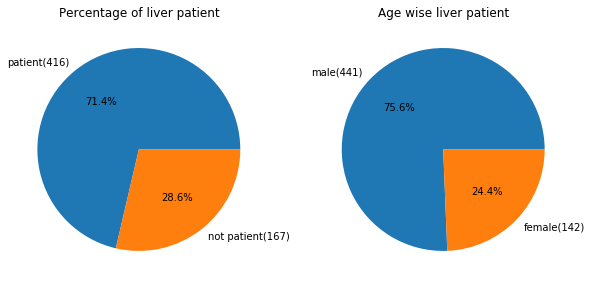

In [8]:
target_counts=df['target'].value_counts().values
gender_counts=df['Gender'].value_counts().values

fig1, axes=plt.subplots(nrows=1, ncols=2,figsize=(10,5))


target_sizes=df.groupby('target').size()
axes[0].pie(
    x=target_counts,
    labels=['patient({})'.format(target_sizes[1]),'not patient({})'.format(target_sizes[2])],
    autopct='%1.1f%%'
)
axes[0].set_title("Percentage of liver patient")

gender_sizes=df.groupby('Gender').size()
axes[1].pie(
    x=gender_counts, 
    labels=['male({})'.format(gender_sizes['Male']), 'female({})'.format(gender_sizes['Female'])], 
    autopct="%1.1f%%"
)
axes[1].set_title("Age wise liver patient")

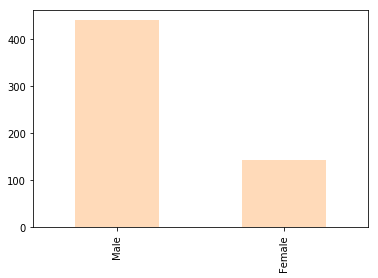

In [9]:
df['Gender'].value_counts().plot.bar(color='peachpuff')

No.of male is more than female.

#### b.	Calculate five-point summary for numerical variables

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
target,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


#### c.	Summarize observations for categorical variables – no. of categories, % observations in each category

In [11]:
df.dtypes.value_counts()

int64      5
float64    5
object     1
dtype: int64

In [12]:
cat_col = ['Gender','target']
print('Categorical columns in the dataset are :',cat_col)
print('No of values in each categories   ')
for i in cat_col:
   print('Column = ',i)
   print(df[i].value_counts())

Categorical columns in the dataset are : ['Gender', 'target']
No of values in each categories   
Column =  Gender
Male      441
Female    142
Name: Gender, dtype: int64
Column =  target
1    416
2    167
Name: target, dtype: int64


In [13]:
print('Percentage of categories in each variable')
for i in cat_col:
   print('Column = ',i)
   print(df[i].value_counts()/len(df[i]))    

Percentage of categories in each variable
Column =  Gender
Male      0.756432
Female    0.243568
Name: Gender, dtype: float64
Column =  target
1    0.713551
2    0.286449
Name: target, dtype: float64


### 3.Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

#### Some pointers which would help you, but don’t be limited by these
#### a.	Do variables have missing/null values?


In [14]:
df.isnull().sum()     

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
target                        0
dtype: int64

There are four missing values in Albumin_and_Globulin_Ratio.Filling missing values with mean.

In [15]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
target                        583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### b.	Do variables have outliers? 

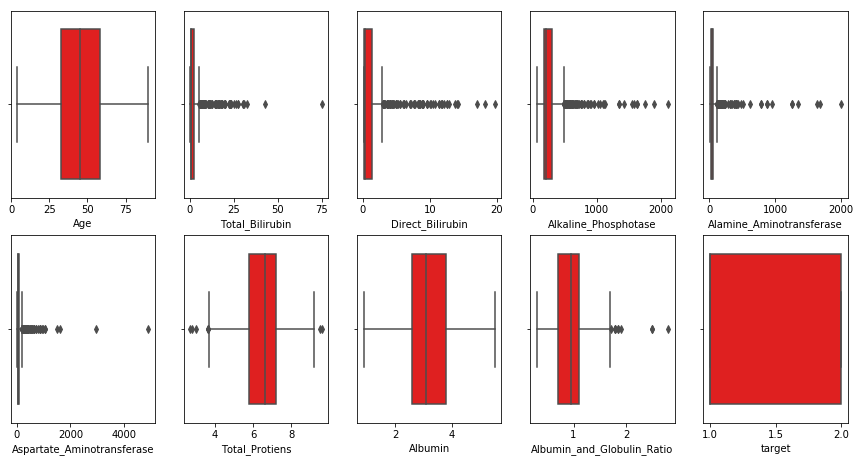

In [16]:
cols = df.select_dtypes(exclude='object')
q=1
plt.figure(figsize=(15,20))
for col in cols:
   plt.subplot(5,5,q)
   ax = sns.boxplot(df[col],color='red')
   plt.xlabel(col)
   q+=1
plt.show()

There are outliers in our dataset but we are not removing off as of now.

#### c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem

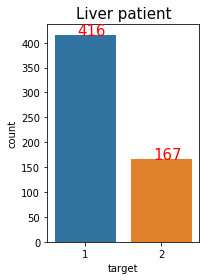

In [17]:
plt.subplot(1,2,1)
ax = sns.countplot(data=df, x='target')
plt.title('Liver patient', fontsize=15)
for i in ax.patches:
    
    ax.text(i.get_x()+0.3, i.get_height(), str(round(i.get_height(), 2)), fontsize=15, color='red')



As we can observe that data is not balanced so we will balance it by smote or nearmiss.

In [18]:
print('We will be using smote when we will splitting the dataset in train and test')


We will be using smote when we will splitting the dataset in train and test


### 4.Summarize relationships among variables (10 marks)               

#### a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

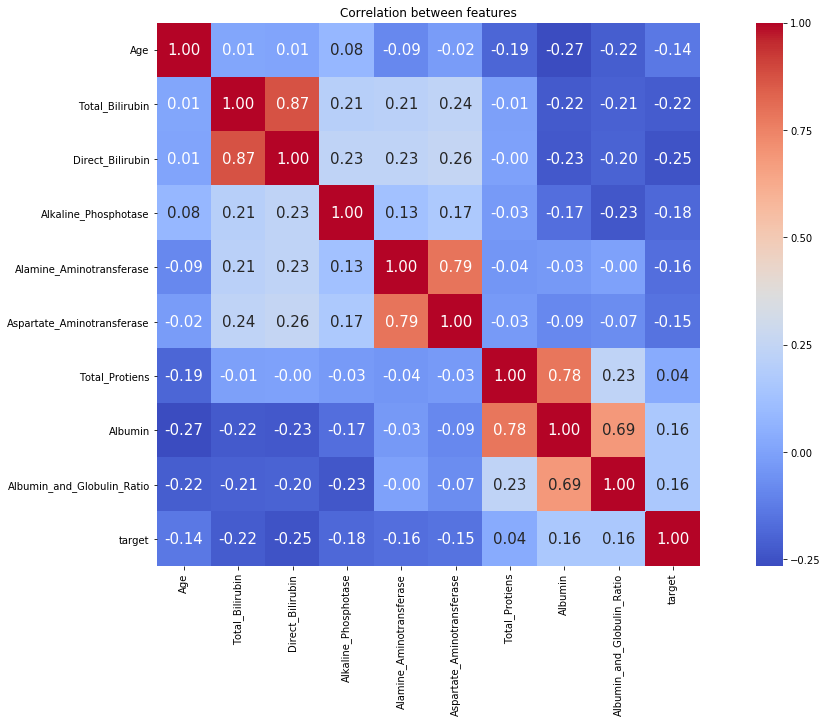

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

#### The above correlation also indicates the following correlation
##### Total_Protiens & Albumin
##### Alamine_Aminotransferase & Aspartate_Aminotransferase
##### Direct_Bilirubin & Total_Bilirubin
##### There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

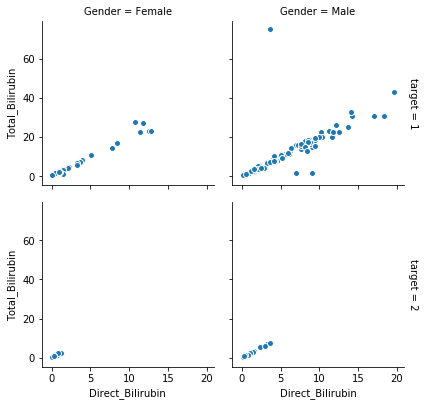

In [20]:
g = sns.FacetGrid(df, col="Gender", row="target", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

### b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

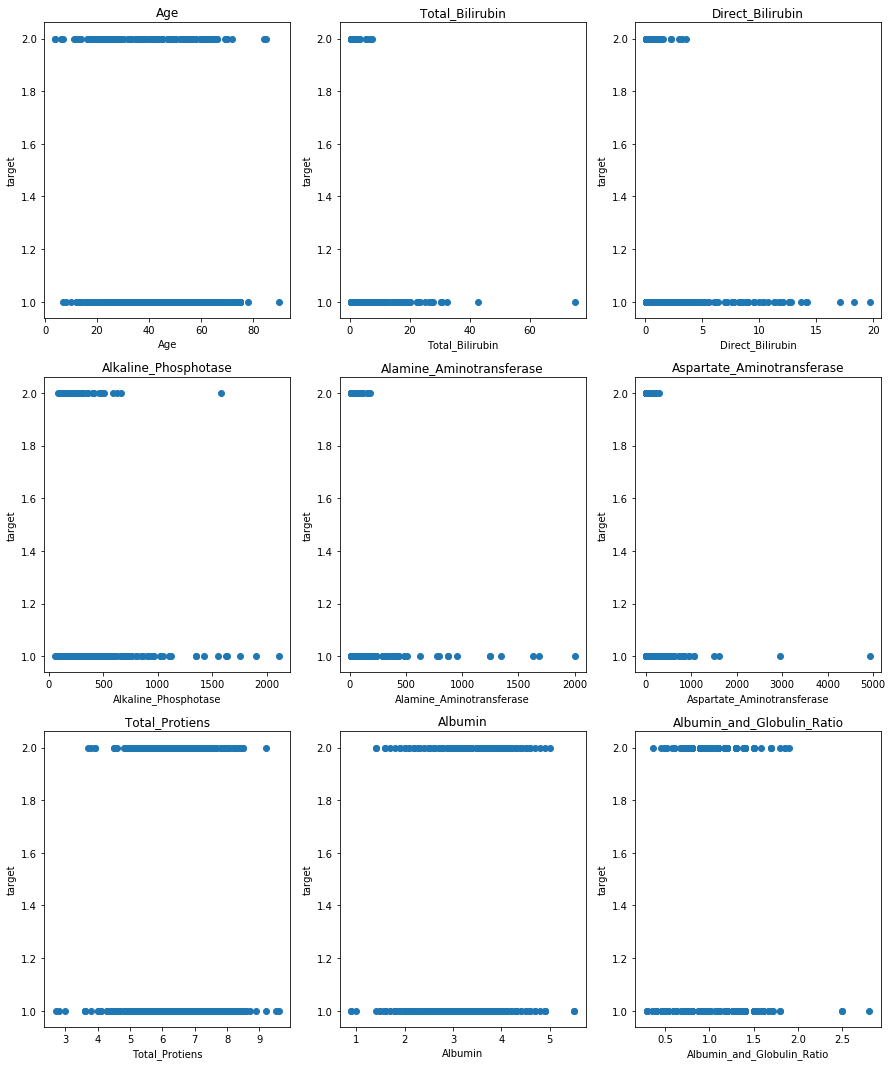

In [21]:
# plotting all the dependent variables with target variable
# plotting scatter plot of continous variable with target variable
num_cols=['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
     'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
     'Albumin', 'Albumin_and_Globulin_Ratio']
q=1
plt.figure(figsize=(15,25))

for i in num_cols:
   plt.subplot(4,3,q)
   plt.title(i)
   plt.scatter(df[i],df["target"])
   plt.xlabel(i)
   plt.ylabel("target")
   q+=1
plt.show()

As we can see the relationship of target variables with each variables in the dataset.

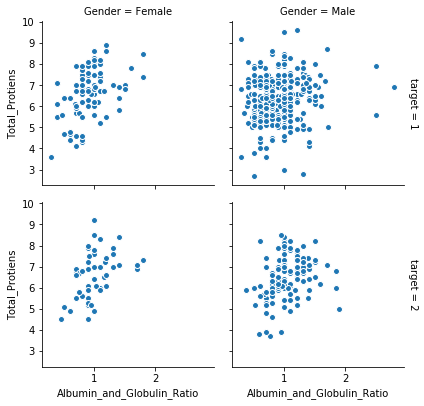

In [22]:
g = sns.FacetGrid(df, col="Gender", row="target", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

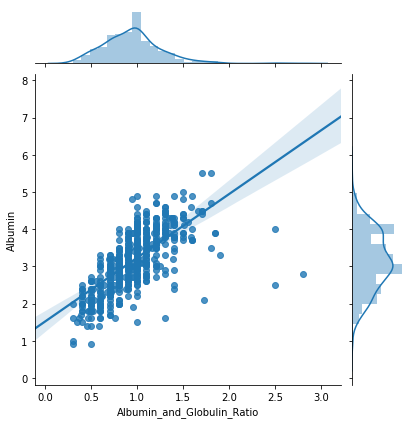

In [23]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=df, kind="reg")

From the above jointplots and scatterplots, we find direct relationship between the following features:
Direct_Bilirubin & Total_Bilirubin
Aspartate_Aminotransferase & Alamine_Aminotransferase
Total_Protiens & Albumin
Albumin_and_Globulin_Ratio & Albumin

In [24]:
# Converting gender into dummies
df = pd.get_dummies(df,columns = ['Gender'],drop_first = True)

In [25]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


### 5.Split dataset into train and test (70:30) 
#### a.	Are both train and test representative of the overall data? How would you ascertain this statistically?



In [26]:
import scipy.stats as st

In [27]:
X=df.drop('target', axis=1)
Y= df['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train , Y_test = train_test_split(X , Y , test_size = 0.30 , random_state =42)
X_train.shape , Y_train.shape

((408, 10), (408,))

H0:mu of Y_train=mu of Y_test =mu of Y
H1:any one of them differs

In [29]:
st.f_oneway(Y_train,Y_test,Y)

F_onewayResult(statistic=0.19507743985612155, pvalue=0.8227978571185324)

P value is greater than 0.05 so we are fai to reject null hypothesis.so mean are same of all.

### Fit a base model and explain the reason of selecting that model. Please write your key observations.
#### a.	What is the overall Accuracy? Please comment on whether it is good or not. 
#### b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.
#### c.	Which variables are significant?
#### d.	What is Cohen’s Kappa Value and what inference do you make from the model
#### e.	Which other key model output parameters do you want to look at? 



### Using base model Logistic Regression 

In [30]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

Logistic Regression Training Score: 
 71.32
Logistic Regression Test Score: 
 72.0
Coefficient: 
 [[-0.00800476 -0.00573585 -0.33200065 -0.00091534 -0.0108002  -0.00243341
  -0.33687015  0.73742924 -0.12539079 -0.07363387]]
Intercept: 
 [0.62265535]
Accuracy: 
 0.72
Confusion Matrix: 
 [[117  11]
 [ 38   9]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.91      0.83       128
           2       0.45      0.19      0.27        47

    accuracy                           0.72       175
   macro avg       0.60      0.55      0.55       175
weighted avg       0.67      0.72      0.68       175



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


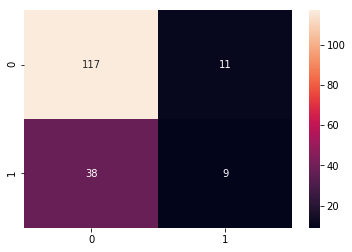

In [31]:
 ## using Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, Y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, Y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, Y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(Y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(Y_test,log_predicted))
print('Classification Report: \n', classification_report(Y_test,log_predicted))

sns.heatmap(confusion_matrix(Y_test,log_predicted),annot=True,fmt="d")

**Overall accuracy is the probability that an individual will be correctly classified by a test; that is, the sum of the true positives plus true negatives divided by the total number of individuals tested.**

**Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.**

Precision = TP/TP+FP

**Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class.**

Recall = TP/TP+FN

**F1 score - F1 Score is the weighted average of Precision and Recall.**
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [32]:
# reading the coefficient parameters
pd.DataFrame(zip(list(X_train.columns),list(logreg.coef_[0])), columns=["Variable","Coefficient"])\
.sort_values('Coefficient').style.background_gradient(cmap='viridis', low=0.2, high=0.2)


,Variable,Coefficient
6,Total_Protiens,-0.33687
2,Direct_Bilirubin,-0.332001
8,Albumin_and_Globulin_Ratio,-0.125391
9,Gender_Male,-0.0736339
4,Alamine_Aminotransferase,-0.0108002
0,Age,-0.00800476
1,Total_Bilirubin,-0.00573585
5,Aspartate_Aminotransferase,-0.00243341
3,Alkaline_Phosphotase,-0.000915338
7,Albumin,0.737429


In [33]:
from sklearn.metrics import cohen_kappa_score

In [34]:
print('Cohen Kappa Score on this model',cohen_kappa_score(Y_test,log_predicted))

Cohen Kappa Score on this model 0.12899949212798367


Cohen's kappa coefficient is a statistic that is used to measure inter-rater reliability for qualitative items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. 

In [35]:

print(f'Coefficients: {logreg.coef_}')
print(f'Intercept: {logreg.intercept_}')
print(f'R^2 score: {logreg.score(X, Y)}')

Coefficients: [[-0.00800476 -0.00573585 -0.33200065 -0.00091534 -0.0108002  -0.00243341
  -0.33687015  0.73742924 -0.12539079 -0.07363387]]
Intercept: [0.62265535]
R^2 score: 0.7152658662092625


### 7. How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. 
#### Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 



## Iteration 1

In [36]:
# Hyper parameter tuning for logistic regression

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, binarize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve


In [38]:
# creating parameter grid
dict_params = {"penalty" : ["l1", "l2"],
               "C" : [0.001, 0.01, 0.1, 1, 10, 100]}

# hyperparameter tuning
base_model = LogisticRegression()
model_tuning = GridSearchCV(base_model, param_grid=dict_params, scoring="roc_auc", cv=4, return_train_score=True)
model_tuning.fit(X,Y)

# model results
cv_results = pd.DataFrame(model_tuning.cv_results_)
cv_results['train_test_diff'] = cv_results['mean_train_score'] - cv_results['mean_test_score']
cv_results.sort_values('train_test_diff')[["param_C","param_penalty","mean_train_score","mean_test_score",'train_test_diff']]

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,param_C,param_penalty,mean_train_score,mean_test_score,train_test_diff
0,0.001,l1,0.724506,0.723725,0.000781
3,0.01,l2,0.756250,0.751926,0.004323
4,0.1,l1,0.755964,0.750376,0.005588
1,0.001,l2,0.752681,0.746719,0.005962
5,0.1,l2,0.760503,0.748754,0.011749
2,0.01,l1,0.733843,0.721195,0.012648
6,1,l1,0.767024,0.748660,0.018364
7,1,l2,0.767316,0.746071,0.021245
8,10,l1,0.772722,0.749828,0.022894
10,100,l1,0.773464,0.749708,0.023756


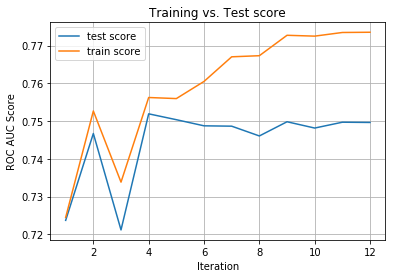

In [39]:
# visualizing training and testing accuracy
plt.plot(cv_results.index+1, cv_results["mean_test_score"], label="test score")
plt.plot(cv_results.index+1, cv_results["mean_train_score"], label="train score")
plt.title("Training vs. Test score")
plt.ylabel("ROC AUC Score")
plt.xlabel("Iteration")
plt.legend()
plt.grid()
plt.show()

In [40]:
# fitting model with best params
model_logit = LogisticRegression(penalty='l1', C=100)
model_logit.fit(X_train, Y_train)
y_pred = model_logit.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


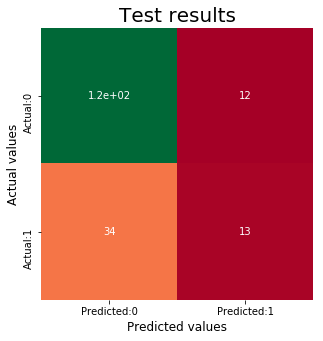

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [41]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(Y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [42]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 13
True negatives: 116
False positives (Type I error): 12
False negatives (Type II error): 34


In [43]:
df_results = pd.DataFrame(columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])

In [44]:
# itereation results
description = "Logit with hyperparamter tuning"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(Y_test,y_pred),2)
recall = round(recall_score(Y_test,y_pred),2)
accuracy = round(accuracy_score(Y_test,y_pred),2)
f1 = round(f1_score(Y_test,y_pred),2)
auc = round(roc_auc_score(Y_test,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Logit with hyperparamter tuning,46,12,34,0.77,0.91,0.74,0.83,0.59


## Iteration 2

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# fitting base model with default params
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
# predicting X_test
y_pred = model_knn.predict(X_test)

# checking for model overfit
print("Training accuracy:", accuracy_score(Y_train,model_knn.predict(X_train)))
print("Test accuracy:", accuracy_score(Y_test,y_pred))

Training accuracy: 0.7916666666666666
Test accuracy: 0.6971428571428572


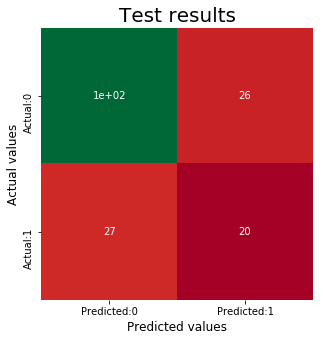

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [47]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(Y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [48]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 20
True negatives: 102
False positives (Type I error): 26
False negatives (Type II error): 27


In [49]:
# itereation results
description = "Base kNN model"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(Y_test,y_pred),2)
recall = round(recall_score(Y_test,y_pred),2)
accuracy = round(accuracy_score(Y_test,y_pred),2)
f1 = round(f1_score(Y_test,y_pred),2)
auc = round(roc_auc_score(Y_test,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Logit with hyperparamter tuning,46,12,34,0.77,0.91,0.74,0.83,0.59
0,Base kNN model,53,26,27,0.79,0.8,0.7,0.79,0.61


In [50]:
## Optimizing for optimal k value.

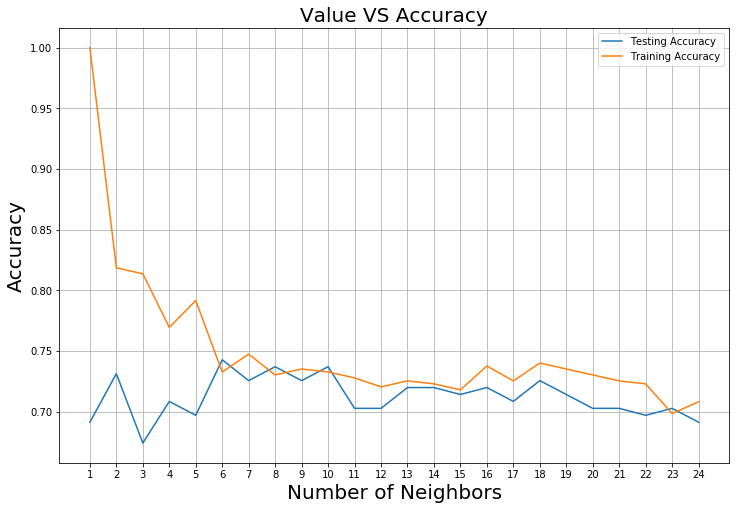

Best accuracy is 0.7428571428571429 with k = 6


In [51]:
# k values for model complexity
neig = np.arange(1, 25)
train_accuracy, test_accuracy = [], []

# loop over different values of k
for k in neig:
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, Y_test))

# Plot
plt.figure(figsize=[12,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with k = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [52]:
# fitting base model with k=6
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [53]:
# predicting X_test
y_pred = model_knn.predict(X_test)

# checking for model overfit
print("Training accuracy:", accuracy_score(Y_train,model_knn.predict(X_train)))
print("Test accuracy:", accuracy_score(Y_test,y_pred))

Training accuracy: 0.7328431372549019
Test accuracy: 0.7428571428571429


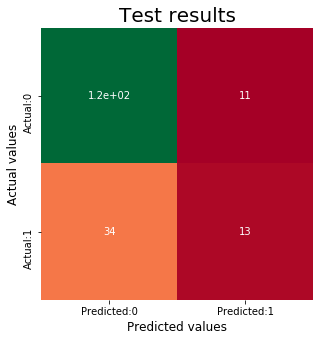

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [54]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(Y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [55]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 13
True negatives: 117
False positives (Type I error): 11
False negatives (Type II error): 34


In [56]:
# itereation results
description = "kNN with optimal k (6)"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(Y_test,y_pred),2)
recall = round(recall_score(Y_test,y_pred),2)
accuracy = round(accuracy_score(Y_test,y_pred),2)
f1 = round(f1_score(Y_test,y_pred),2)
auc = round(roc_auc_score(Y_test,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Logit with hyperparamter tuning,46,12,34,0.77,0.91,0.74,0.83,0.59
0,Base kNN model,53,26,27,0.79,0.8,0.7,0.79,0.61
0,kNN with optimal k (6),45,11,34,0.77,0.91,0.74,0.84,0.6


In [57]:
# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier 

In [59]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
# predicting X_test
y_pred = model_rfc.predict(X_test)

# checking for model overfit
print("Training accuracy:", accuracy_score(Y_train,model_knn.predict(X_train)))
print("Test accuracy:", accuracy_score(Y_test,y_pred))

Training accuracy: 0.7328431372549019
Test accuracy: 0.72


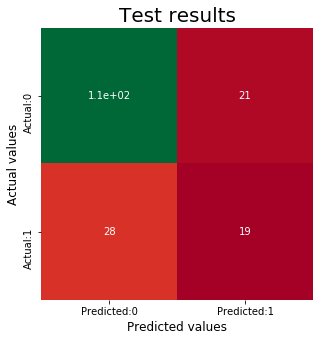

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [61]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(Y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [62]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 19
True negatives: 107
False positives (Type I error): 21
False negatives (Type II error): 28


In [63]:
# itereation results
description = "Base random forest"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(Y_test,y_pred),2)
recall = round(recall_score(Y_test,y_pred),2)
accuracy = round(accuracy_score(Y_test,y_pred),2)
f1 = round(f1_score(Y_test,y_pred),2)
auc = round(roc_auc_score(Y_test,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Logit with hyperparamter tuning,46,12,34,0.77,0.91,0.74,0.83,0.59
0,Base kNN model,53,26,27,0.79,0.8,0.7,0.79,0.61
0,kNN with optimal k (6),45,11,34,0.77,0.91,0.74,0.84,0.6
0,Base random forest,49,21,28,0.79,0.84,0.72,0.81,0.62


**As we can see that logistic regression and KNN with k=6 is the best model for us as it gives best accuracy.**

### 8. Summarize as follows 
#### 1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
#### 2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
#### 3.	What changes from the base model had the most effect on model performance?
#### 4.	What are the key risks to your results and interpretation?


1.

As we can see that KNN with k=6 is the best model for us as it gives best accuracy.We use optimum k value 6 by hyper parameter tuning.It gives 74% accuracy. Logistic regression is also giving almost same accuracy.

2.

Correlation of selector with all independent variables


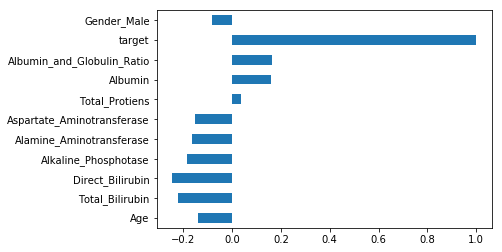

In [64]:
print('Correlation of selector with all independent variables')
df.corr()['target'].plot.barh()
plt.show()

Albumin and Albumin_and_Globulin ratio,Total_Protiens are the variables which are afftecting target variable most

3.

We are changing value of k by doing hyper parameter tuning. We get optimum k value 6 for the model.it increases the accuracy compared to base model.

4.

- Mitigating Risk of Machine Learning
- Data Difficulties.
- Technology Troubles.
- Security Snags.
- Models Misbehaving.
- Interaction Issues.